# IMPORT DES BIBLIOTHEQUES NÉCESSAIRES

In [2]:
import numpy as np
import os
import random
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# TÉLÉCHARGEMENT DES DONNÉES

In [3]:
dataset_url = "http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/EnglishFnt.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)

49817950/49817950 [==============================] - 3s 0us/step


In [4]:
archive

'/root/.keras/datasets/EnglishFnt.tgz'

In [5]:
archive = archive[:-7]+'/Fnt'
data_dir = pathlib.Path(archive)

# CRÉATION DU DATASET

In [49]:
batch_size = 64 #pour optimiser l'utilisation du GPU Kaggle 
img_height = 128
img_width = 128
num_classes = 62

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 62992 files belonging to 62 classes.
Using 50394 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 62992 files belonging to 62 classes.
Using 12598 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['Sample001', 'Sample002', 'Sample003', 'Sample004', 'Sample005', 'Sample006', 'Sample007', 'Sample008', 'Sample009', 'Sample010', 'Sample011', 'Sample012', 'Sample013', 'Sample014', 'Sample015', 'Sample016', 'Sample017', 'Sample018', 'Sample019', 'Sample020', 'Sample021', 'Sample022', 'Sample023', 'Sample024', 'Sample025', 'Sample026', 'Sample027', 'Sample028', 'Sample029', 'Sample030', 'Sample031', 'Sample032', 'Sample033', 'Sample034', 'Sample035', 'Sample036', 'Sample037', 'Sample038', 'Sample039', 'Sample040', 'Sample041', 'Sample042', 'Sample043', 'Sample044', 'Sample045', 'Sample046', 'Sample047', 'Sample048', 'Sample049', 'Sample050', 'Sample051', 'Sample052', 'Sample053', 'Sample054', 'Sample055', 'Sample056', 'Sample057', 'Sample058', 'Sample059', 'Sample060', 'Sample061', 'Sample062']


In [9]:
classArr = [str(i) for i in range(10)]
classArr.extend([chr(i) for i in range(ord('A'), ord('Z')+1)])
classArr.extend([chr(i) for i in range(ord('a'), ord('z')+1)])

In [ ]:
classArr

# VISUALISATION DES DONNÉES

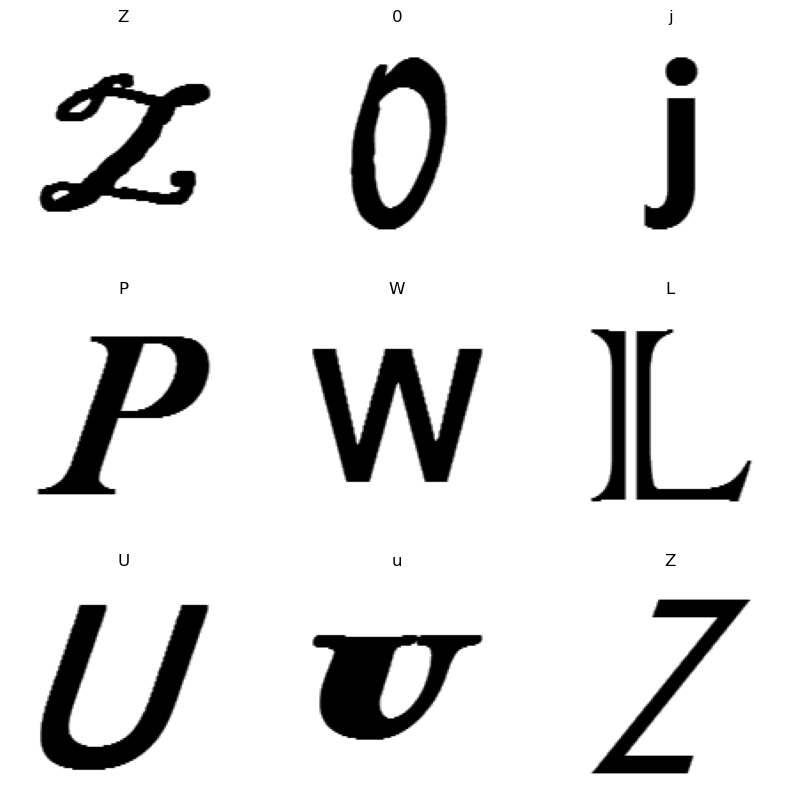

In [60]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classArr[labels[i]])
    plt.axis("off")
plt.savefig("chars74k_sample.png", dpi=300)

# MODELE 1 

In [46]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [47]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        #on veut une probabilité d'appartenance aux classes
  metrics=['accuracy'])

In [48]:
epochs = 15

In [49]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
1575/1575 [==============================] - 32s 19ms/step - loss: 0.7815 - accuracy: 0.7801 - val_loss: 0.4136 - val_accuracy: 0.8593
Epoch 2/15
1575/1575 [==============================] - 30s 19ms/step - loss: 0.3328 - accuracy: 0.8814 - val_loss: 0.3520 - val_accuracy: 0.8766
Epoch 3/15
1575/1575 [==============================] - 30s 19ms/step - loss: 0.2379 - accuracy: 0.9093 - val_loss: 0.3373 - val_accuracy: 0.8838
Epoch 4/15
1575/1575 [==============================] - 28s 18ms/step - loss: 0.1950 - accuracy: 0.9257 - val_loss: 0.3226 - val_accuracy: 0.8882
Epoch 5/15
1575/1575 [==============================] - 30s 19ms/step - loss: 0.1668 - accuracy: 0.9343 - val_loss: 0.3286 - val_accuracy: 0.8901
Epoch 6/15
1575/1575 [==============================] - 30s 19ms/step - loss: 0.1432 - accuracy: 0.9441 - val_loss: 0.3534 - val_accuracy: 0.8900
Epoch 7/15
1575/1575 [==============================] - 29s 19ms/step - loss: 0.1279 - accuracy: 0.9504 - val_loss: 0.3650 -

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9

**Visualisation des résultats du premier modèle**

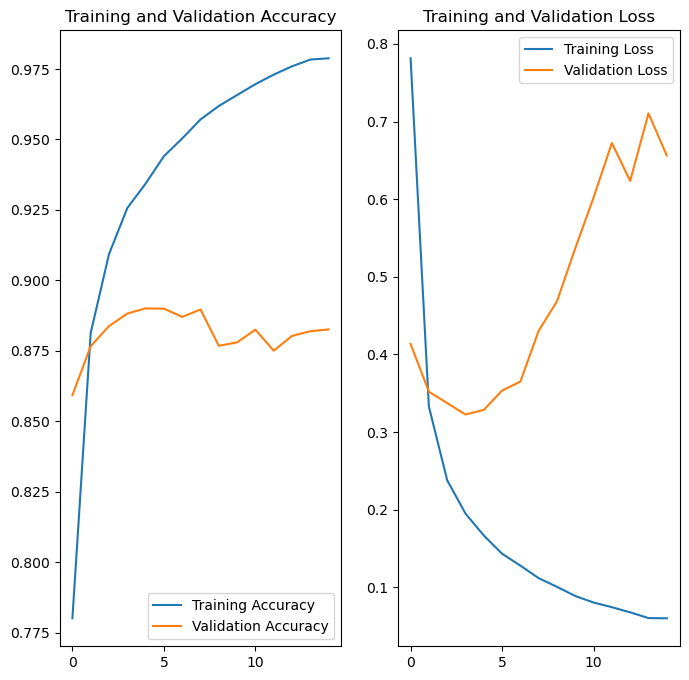

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# RENFORCEMENT DU MODELE : DATA AUGMENTATION

In [65]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomRotation(0.02, fill_mode='constant',fill_value=255.0),
    tf.keras.layers.RandomZoom(height_factor=0.1,width_factor=0.1,fill_mode='constant',fill_value=255.0),
  ]
)

Visualisation des effets de la data augmentation pour une image aléatoire

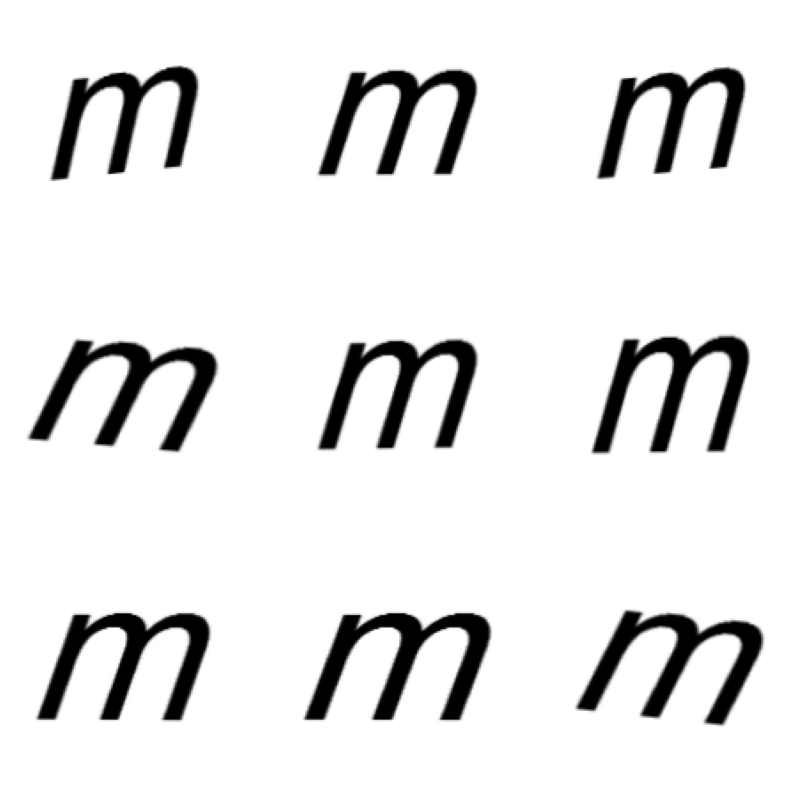

In [66]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# MODELE 2

In [67]:
model_aug = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2), #on ajoute également un layer de dropout
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [68]:
model_aug.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [69]:
epochs = 15
history = model_aug.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
1575/1575 [==============================] - 28s 16ms/step - loss: 0.9011 - accuracy: 0.7441 - val_loss: 0.4904 - val_accuracy: 0.8341
Epoch 2/15
1575/1575 [==============================] - 25s 16ms/step - loss: 0.4576 - accuracy: 0.8419 - val_loss: 0.3896 - val_accuracy: 0.8651
Epoch 3/15
1575/1575 [==============================] - 27s 17ms/step - loss: 0.3745 - accuracy: 0.8586 - val_loss: 0.3877 - val_accuracy: 0.8652
Epoch 4/15
1575/1575 [==============================] - 29s 18ms/step - loss: 0.3293 - accuracy: 0.8719 - val_loss: 0.3477 - val_accuracy: 0.8777
Epoch 5/15
1575/1575 [==============================] - 27s 17ms/step - loss: 0.3010 - accuracy: 0.8790 - val_loss: 0.3070 - val_accuracy: 0.8877
Epoch 6/15
1575/1575 [==============================] - 27s 17ms/step - loss: 0.2789 - accuracy: 0.8864 - val_loss: 0.3031 - val_accuracy: 0.8887
Epoch 7/15
1575/1575 [==============================] - 26s 16ms/step - loss: 0.2614 - accuracy: 0.8925 - val_loss: 0.3095 -

In [70]:
model_aug.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                 

**Visualisation des résultats de l'entraînement du modèle 2**

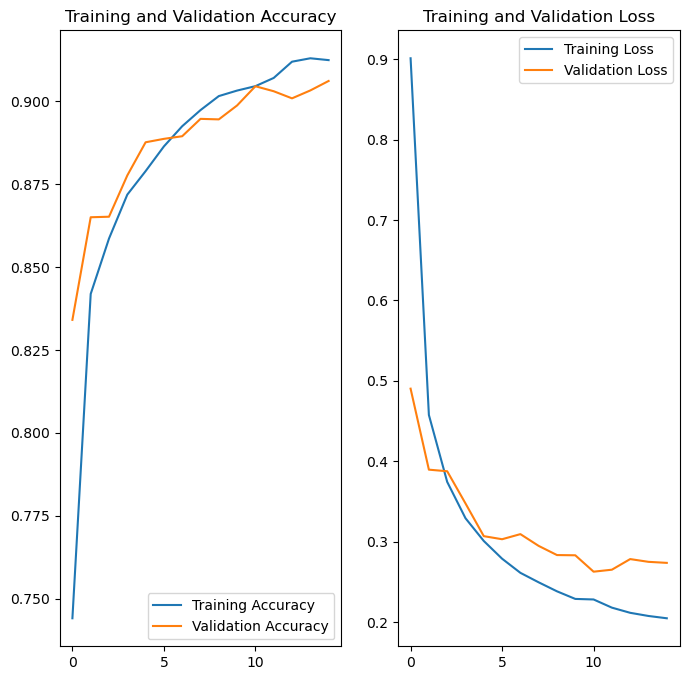

In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Enregistrons ce modèle pour ne pas avoir à réapprendre quand le kernel python sera arrêté

In [125]:
model_aug.save('model_aug')

In [127]:
import shutil
shutil.make_archive('model_aug', 'zip', '/kaggle/working')

'/kaggle/working/model_aug.zip'

# MODELE 3

In [77]:
model_3 = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 4, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size = 4, strides = 2),
  tf.keras.layers.Conv2D(64, 4, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size = 4,strides = 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.4), #on ajoute également un layer de dropout
  tf.keras.layers.Dense(310, activation='relu'),
  tf.keras.layers.Dense(num_classes, name="outputs") 
])

In [78]:
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [80]:
epochs = 15
history = model_3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
1575/1575 [==============================] - 34s 20ms/step - loss: 0.7234 - accuracy: 0.7856 - val_loss: 0.4147 - val_accuracy: 0.8561
Epoch 2/15
1575/1575 [==============================] - 33s 21ms/step - loss: 0.3729 - accuracy: 0.8586 - val_loss: 0.3742 - val_accuracy: 0.8686
Epoch 3/15
1575/1575 [==============================] - 32s 21ms/step - loss: 0.3111 - accuracy: 0.8772 - val_loss: 0.2940 - val_accuracy: 0.8868
Epoch 4/15
1575/1575 [==============================] - 32s 20ms/step - loss: 0.2785 - accuracy: 0.8862 - val_loss: 0.2991 - val_accuracy: 0.8873
Epoch 5/15
1575/1575 [==============================] - 34s 21ms/step - loss: 0.2579 - accuracy: 0.8931 - val_loss: 0.2735 - val_accuracy: 0.8970
Epoch 6/15
1575/1575 [==============================] - 32s 20ms/step - loss: 0.2398 - accuracy: 0.8993 - val_loss: 0.2734 - val_accuracy: 0.9026
Epoch 7/15
1575/1575 [==============================] - 32s 20ms/step - loss: 0.2289 - accuracy: 0.9035 - val_loss: 0.2690 -

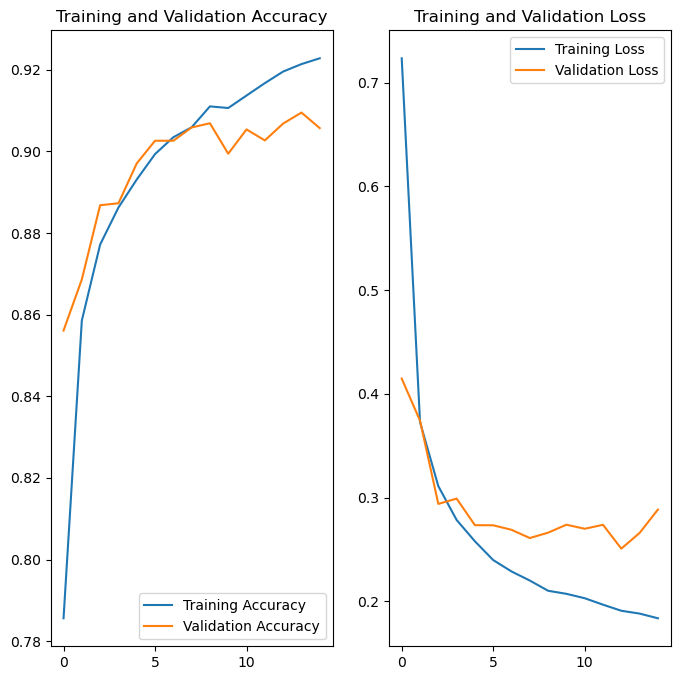

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_trained = len(history.history['loss'])
epochs_range = range(epochs_trained)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      1568      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 63, 63, 64)        32832     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                  

# MODELE 4 : OPTIMISATION DES HYPERPARAMETRES

**On créé un constructeur de modèle que le tuner va appeler**

In [101]:
def model_builder(hp):
    model = tf.keras.Sequential([
        data_augmentation,
        tf.keras.layers.Rescaling(1./255)])
    
    hp_filters_1 = hp.Int('filters_hp_1', min_value = 16, max_value = 32, step = 16)    
    model.add(tf.keras.layers.Conv2D(hp_filters_1, 4, padding='same', activation='relu'))  
    model.add(tf.keras.layers.MaxPooling2D(pool_size = 4, strides = 2))
    
    hp_filters_2 = hp.Int('filters_hp_2', min_value = 16, max_value = 32, step = 16)    
    model.add(tf.keras.layers.Conv2D(hp_filters_2, 4, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = 4,strides = 2))      

    hp_filters_3 = hp.Int('filters_hp_3', min_value = 16, max_value = 64, step = 16)    
    model.add(tf.keras.layers.Conv2D(hp_filters_3, 4, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = 4,strides = 2))
    
    
    model.add(tf.keras.layers.Flatten())

    hp_dropout = hp.Float('dropout', 0.3, 0.7, step=0.1)
    model.add(tf.keras.layers.Dropout(hp_dropout)) 

    hp_units = hp.Int('units', min_value=256, max_value=512, step=32)
    model.add(tf.keras.layers.Dense(units=hp_units, activation='relu'))
    
    model.add(tf.keras.layers.Dense(num_classes, name="outputs"))
    
    #hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(),#learning_rate=hp_learning_rate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    return model

**Création du tuner**

In [103]:
import keras_tuner as kt
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=13,
                     factor=3,
                     directory='model_4_v2',
                     project_name='model_4_tuning')

**On ajoute un callback pour que la recherche ne prenne pas trop de temps (temps GPU Kaggle limité)**

In [104]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tuner.search(train_ds, validation_data=val_ds, callbacks=[stop_early])
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 30 Complete [00h 04m 04s]
val_accuracy: 0.8942689299583435

Best val_accuracy So Far: 0.9063343405723572
Total elapsed time: 01h 11m 26s


**Meilleurs hyperparamètres**

In [109]:
print(best_hps.get('filters_hp_1'),best_hps.get('filters_hp_2'),best_hps.get('filters_hp_3'),best_hps.get('dropout'),best_hps.get('units'))

16 32 64 0.6000000000000001 288


**On construit le modèle avec les meilleurs hyperparamètres**

In [110]:
model_4 = tuner.hypermodel.build(best_hps)
history = model_4.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
1575/1575 [==============================] - 31s 18ms/step - loss: 0.8485 - accuracy: 0.7525 - val_loss: 0.4500 - val_accuracy: 0.8476
Epoch 2/20
1575/1575 [==============================] - 29s 18ms/step - loss: 0.4436 - accuracy: 0.8400 - val_loss: 0.3546 - val_accuracy: 0.8716
Epoch 3/20
1575/1575 [==============================] - 27s 17ms/step - loss: 0.3746 - accuracy: 0.8550 - val_loss: 0.3236 - val_accuracy: 0.8804
Epoch 4/20
1575/1575 [==============================] - 26s 17ms/step - loss: 0.3297 - accuracy: 0.8681 - val_loss: 0.3125 - val_accuracy: 0.8863
Epoch 5/20
1575/1575 [==============================] - 28s 18ms/step - loss: 0.3077 - accuracy: 0.8749 - val_loss: 0.3157 - val_accuracy: 0.8845
Epoch 6/20
1575/1575 [==============================] - 27s 17ms/step - loss: 0.2918 - accuracy: 0.8803 - val_loss: 0.2799 - val_accuracy: 0.8959
Epoch 7/20
1575/1575 [==============================] - 28s 18ms/step - loss: 0.2771 - accuracy: 0.8838 - val_loss: 0.2666 -

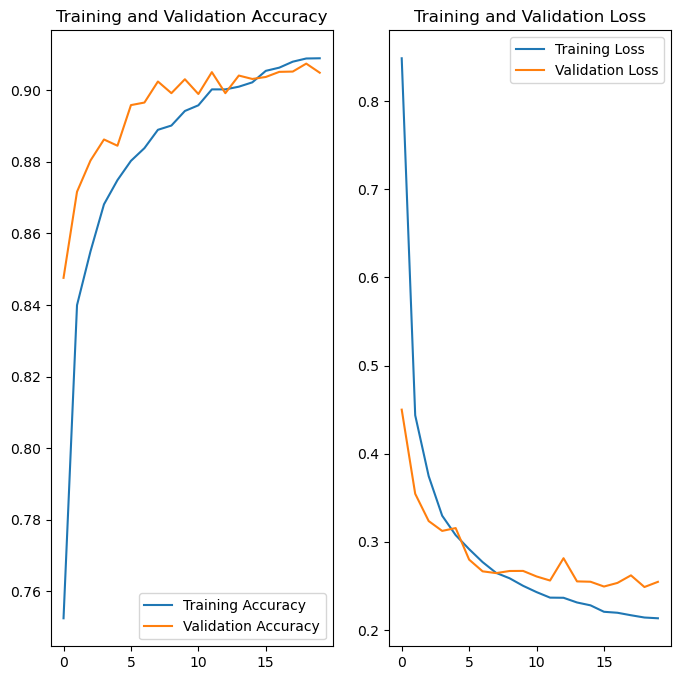

In [119]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_trained = len(history.history['loss'])
epochs_range = range(epochs_trained)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("modele_4.png", dpi=300)
plt.show()


**On entraine le modèle à nouveau avec le nombre d'époques optimal**

In [120]:
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 19


In [121]:
hypermodel = tuner.hypermodel.build(best_hps)
hypermodel.fit(train_ds, validation_data=val_ds, epochs=best_epoch)

Epoch 1/19
1575/1575 [==============================] - 29s 17ms/step - loss: 0.7579 - accuracy: 0.7746 - val_loss: 0.4173 - val_accuracy: 0.8597
Epoch 2/19
1575/1575 [==============================] - 28s 18ms/step - loss: 0.3960 - accuracy: 0.8551 - val_loss: 0.3326 - val_accuracy: 0.8775
Epoch 3/19
1575/1575 [==============================] - 26s 16ms/step - loss: 0.3342 - accuracy: 0.8696 - val_loss: 0.3278 - val_accuracy: 0.8844
Epoch 4/19
1575/1575 [==============================] - 27s 17ms/step - loss: 0.3031 - accuracy: 0.8771 - val_loss: 0.2979 - val_accuracy: 0.8866
Epoch 5/19
1575/1575 [==============================] - 28s 18ms/step - loss: 0.2797 - accuracy: 0.8844 - val_loss: 0.2731 - val_accuracy: 0.8924
Epoch 6/19
1575/1575 [==============================] - 28s 18ms/step - loss: 0.2662 - accuracy: 0.8878 - val_loss: 0.2728 - val_accuracy: 0.8956
Epoch 7/19
1575/1575 [==============================] - 26s 16ms/step - loss: 0.2523 - accuracy: 0.8955 - val_loss: 0.2626 -

# PREDICTION SUR DE NOUVELLES DONNÉES

**DATASET MINST**

In [122]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


In [124]:
img_index = np.random.randint(len(x_test))

In [126]:
img = 255-x_test[img_index]

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

img_array = tf.image.resize(img_array,[128,128],method='nearest')
img_array = tf.image.grayscale_to_rgb(img_array)

predictions = model_3.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} % confidence."
    .format(classArr[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 92ms/step
This image most likely belongs to 1 with a 63.24 % confidence.


**Image originale**

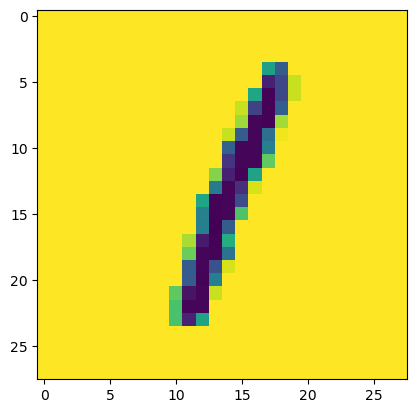

In [127]:
plt.imshow(tf.reshape(img, (28,28))/255)

**Image après upsampling**

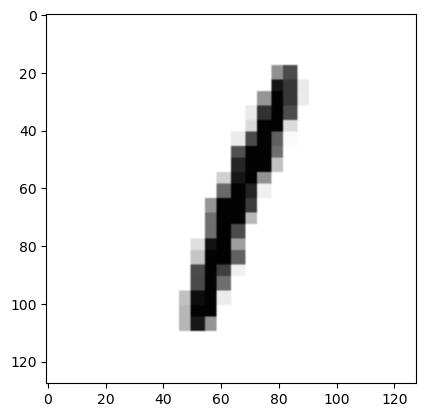

In [128]:
plt.imshow(img_array[0].numpy().astype("uint8"))

**Dataset alphabet-characters-fonts**

In [153]:
random_letter = random.choice(string.ascii_letters).upper()
file =  str(random.choice(os.listdir(
    "/kaggle/input/alphabet-characters-fonts-dataset/Images/Images/"+random_letter)))
img_path = "/kaggle/input/alphabet-characters-fonts-dataset/Images/Images/"+random_letter+"/"+file

In [154]:
img = tf.keras.utils.load_img(img_path, target_size=(28, 28))
img = 255-np.asarray(img) #la normalisation est intégrée au modele

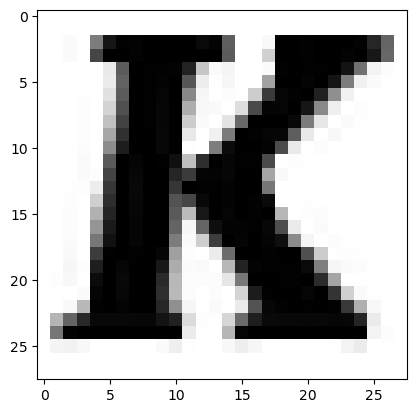

In [155]:
plt.imshow(img)

In [156]:
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

img_array = tf.image.resize(img_array,[128,128],method='nearest')
#img_array = tf.image.grayscale_to_rgb(img_array)

predictions = model_3.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} % confidence."
    .format(classArr[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 18ms/step
This image most likely belongs to K with a 98.16 % confidence.


# Test sur un texte

In [159]:
texte = "APR"
chiffres = "2023"

On sélectionne une police aléatoire pour chaque caractère

1/1 [==============================] - 0s 23ms/step
This image most likely belongs to A with a 24.75 % confidence.
1/1 [==============================] - 0s 22ms/step
This image most likely belongs to P with a 64.78 % confidence.
1/1 [==============================] - 0s 21ms/step
This image most likely belongs to Q with a 41.87 % confidence.


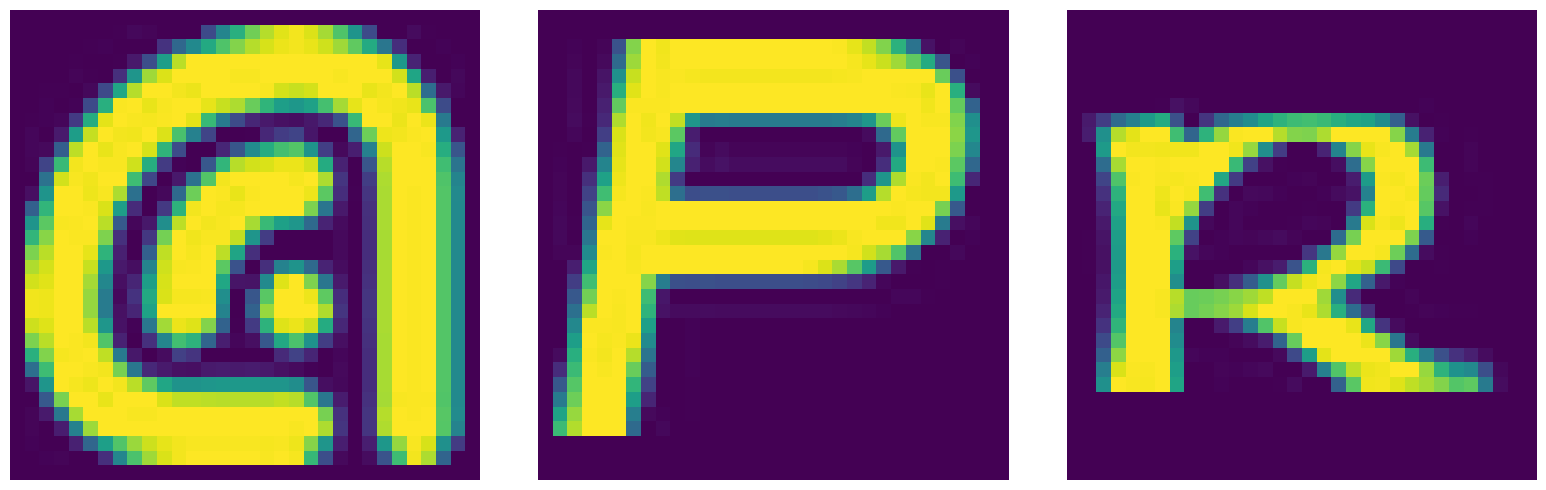

In [211]:
fig, axs = plt.subplots(1,len(texte), figsize = (16,5))
pred = ''

for i,char in enumerate(texte):
    file = str(random.choice(os.listdir(
        "/kaggle/input/alphabet-characters-fonts-dataset/Images/Images/"+char.upper())))
    img_path = "/kaggle/input/alphabet-characters-fonts-dataset/Images/Images/"+char.upper()+"/"+file
    img = tf.keras.utils.load_img(img_path, target_size=(28, 28))
    img = 255-np.asarray(img) #la normalisation est intégrée au model_3 !!
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    img_array = tf.image.resize(img_array,[128,128],method='nearest')
    #img_array = tf.image.grayscale_to_rgb(img_array)

    predictions = hypermodel.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
    "This image most likely belongs to {} with a {:.2f} % confidence."
    .format(classArr[np.argmax(score)], 100 * np.max(score))
    )
    pred+=str(classArr[np.argmax(score)])
    
    image_data = PIL.Image.open(img_path)
    axs[i].imshow(image_data)
    axs[i].axis('off')

plt.tight_layout()


In [212]:
print(pred)
print(texte)

APQ
APR


Pas très concluant mais les caractères sont plus "bizarres" que dans le dataset d'entraînement

**Essayons avec une police plus conventionnelle**

1/1 [==============================] - 0s 23ms/step
This image most likely belongs to A with a 98.34 % confidence.
1/1 [==============================] - 0s 21ms/step
This image most likely belongs to P with a 93.62 % confidence.
1/1 [==============================] - 0s 21ms/step
This image most likely belongs to R with a 99.53 % confidence.


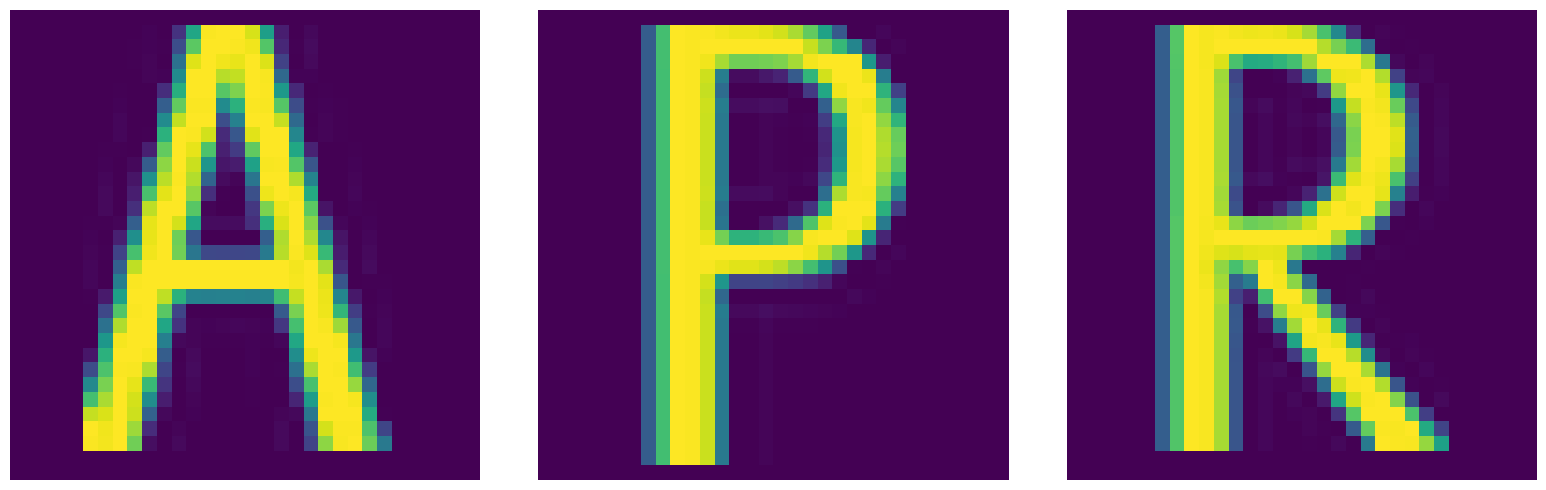

In [169]:
fig, axs = plt.subplots(1,len(texte), figsize = (16,5))
sol = ''
for i,char in enumerate(texte):
    img_path = "/kaggle/input/alphabet-characters-fonts-dataset/Images/Images/"+char.upper()+"/"+'0.png'
    img = tf.keras.utils.load_img(img_path, target_size=(28, 28))
    img = 255-np.asarray(img) #la normalisation est intégrée au modele 
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    img_array = tf.image.resize(img_array,[128,128],method='nearest')

    predictions = hypermodel.predict(img_array)
    score = tf.nn.softmax(predictions[0]) #On applique maintenant le softmax

    print(
    "This image most likely belongs to {} with a {:.2f} % confidence."
    .format(classArr[np.argmax(score)], 100 * np.max(score))
    )
    sol+=str(classArr[np.argmax(score)])
    
    image_data = PIL.Image.open(img_path)
    axs[i].imshow(image_data)
    axs[i].axis('off')

plt.tight_layout()

Ça marche beaucoup mieux 

**Essayons avec les chiffres maintenant**

1/1 [==============================] - 0s 24ms/step
This image most likely belongs to A with a 99.61 % confidence.
1/1 [==============================] - 0s 22ms/step
This image most likely belongs to 0 with a 56.83 % confidence.
1/1 [==============================] - 0s 24ms/step
This image most likely belongs to 7 with a 28.55 % confidence.
1/1 [==============================] - 0s 23ms/step
This image most likely belongs to 3 with a 59.03 % confidence.


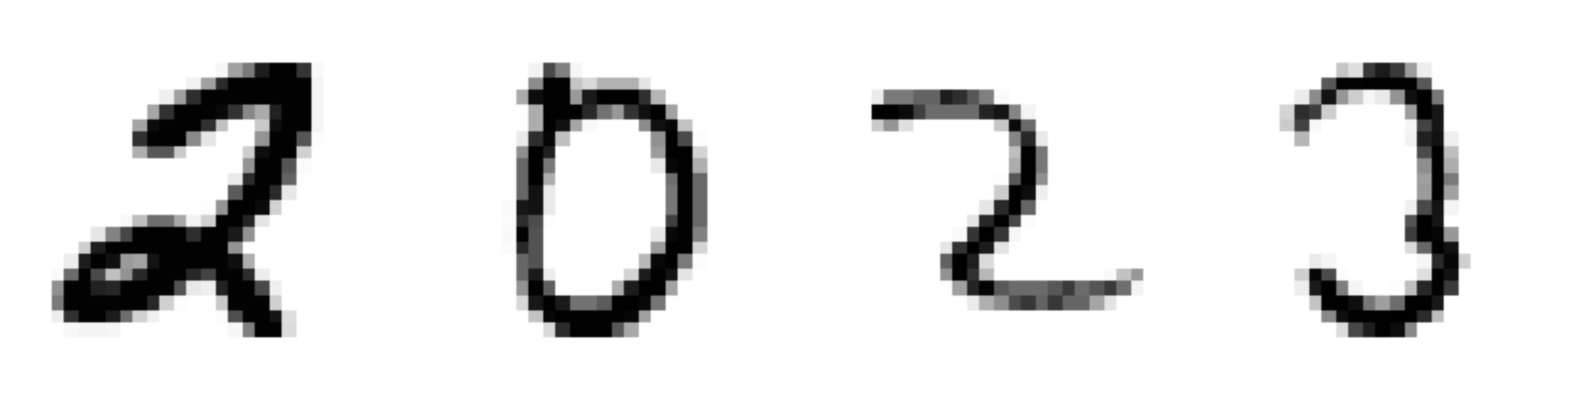

In [209]:
fig, axs = plt.subplots(1,len(chiffres), figsize = (16,5))
sol = ''

for i,char in enumerate(chiffres):
    
    indexes = np.where(y_test == int(char))[0]
    random_index = indexes[np.random.randint(len(indexes))]
    random_img = x_test[random_index]
    
    img = 255-random_img
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    img_array = tf.image.resize(img_array,[128,128],method='nearest')
    img_array = tf.image.grayscale_to_rgb(img_array)

    predictions = hypermodel.predict(img_array)
    score = tf.nn.softmax(predictions[0]) #On applique maintenant le softmax

    print(
    "This image most likely belongs to {} with a {:.2f} % confidence."
    .format(classArr[np.argmax(score)], 100 * np.max(score))
    )
    sol+=str(classArr[np.argmax(score)])
    
    axs[i].imshow(img_array[0].numpy().astype("uint8"))
    axs[i].axis('off')

plt.tight_layout()
    

La reconnaissance n'est pas très bonne. Cela paraît logique car ce dataset contient des caractères écrits à la main et non provenant d'une police d'écriture.

# FIN